In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [129]:
plt.rcParams['figure.figsize'] = [16, 8]

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

### Задание 1

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
1. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
1. Разделите данные на выборку для обучения и тестирования
1. Постройте модель LDA
1. Визуализируйте предсказания для тестовой выборки и центры классов
1. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
1. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [130]:
iris = load_iris()

In [131]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [132]:
X = df_iris[['sepal length (cm)','sepal width (cm)']]
y = iris.target

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [134]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [135]:
accuracy_score(y_test, lda.predict(X_test))

0.8444444444444444

In [136]:
def plot_decision_regions (X, y, classifier, test_idx=None, resolution=0.02):
    #настроить генератор маркеров и палитру
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #вывести поверхность решения
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    #Массивы xx1 и xx2 нужны для дальнейшего перебора всех возможных комбинаций значений признаков.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    #Проходим по всем комбинациям значений первого и второго признаков, для каждого из них делая прогноз.
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Z принимает форму массива xx1. Каждой координате xx1 и xx2 сопоставлено целевое значение 1 или -1.
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #Показать образцы классов
    #idx и cl сначала оба принимают значения -1, затем 1. Таким образом, для х и y выбираются точки, где y=-1,а затем где y=1.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        #выделить тестовые образцы
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:, 1], facecolors='none', edgecolors='black', s = 100, label = 'тестовый набор')
        
    plt.scatter(classifier.means_[:, 0], classifier.means_[:, 1], c='black', s=250, marker='*', label = 'центр класса')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


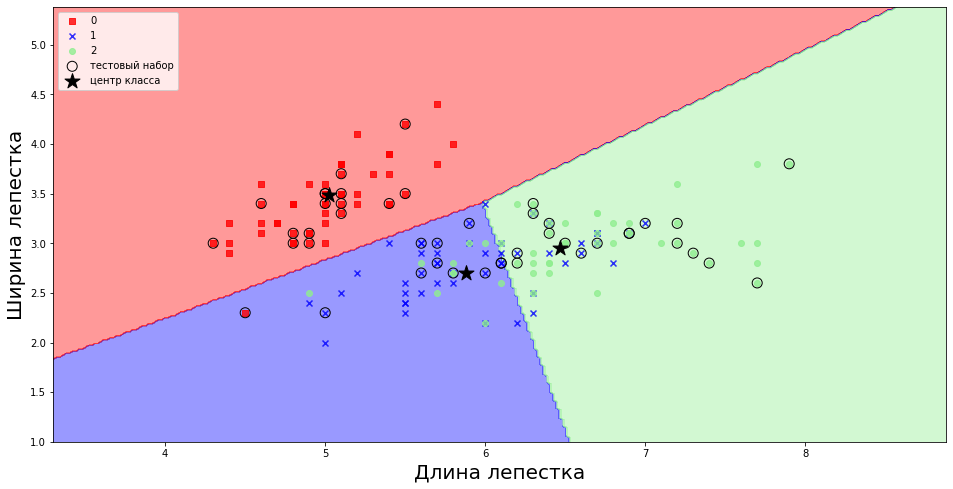

Число ошибочно классифицированных образцов: 7


In [137]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lda, test_idx=range(X.shape[0]-X_test.shape[0],X.shape[0]))
plt.xlabel('Длина лепестка', fontsize=20)
plt.ylabel('Ширина лепестка', fontsize=20)
plt.legend(loc='upper left')
plt.show()

y_pred = lda.predict(X_test)
print('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Как видим, модель работает не очень-то хорошо, сталкиваясь с проблемой линейной неразделимости классов

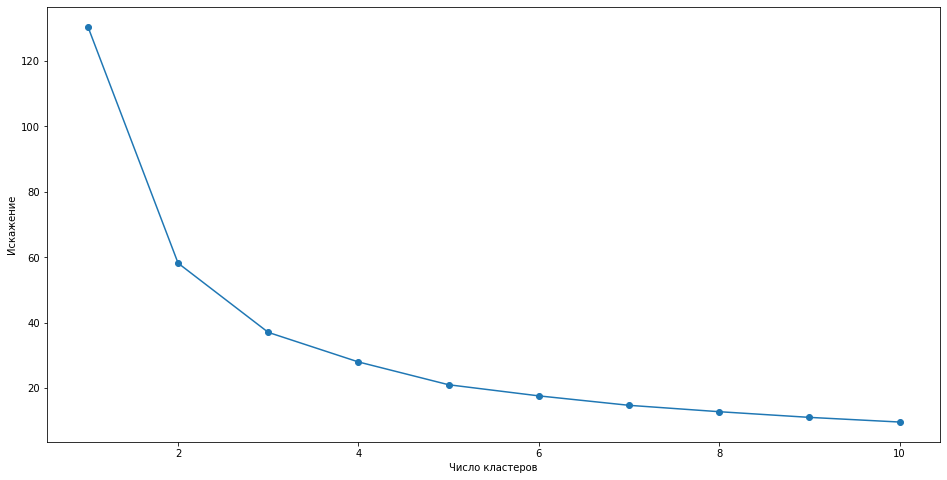

In [143]:
#Подбираем оптимальное число кластеров
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Искажение')
plt.show()

Оптимальное число кластеров: 3

In [147]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
X = np.array(X)
y_km = km.fit_predict(X)

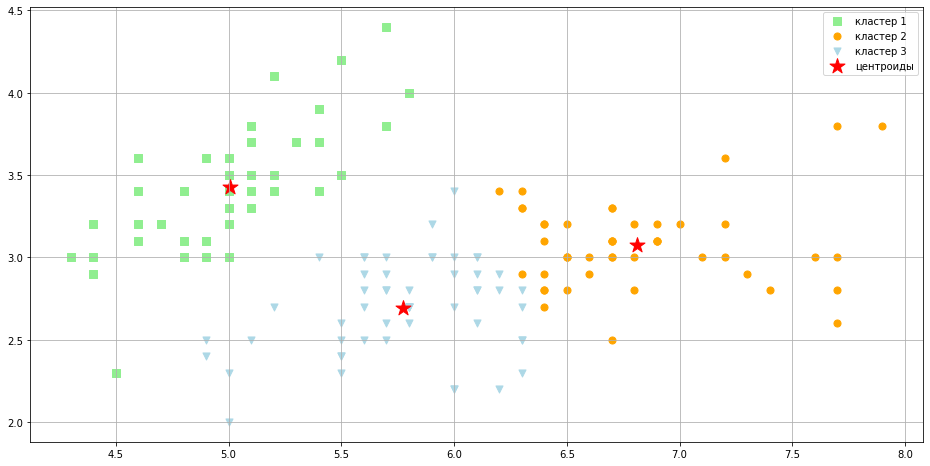

In [148]:
plt.scatter(X[y_km==0,0],
           X[y_km==0,1],
           s = 50,
           c = 'lightgreen',
           marker = 's',
           label = 'кластер 1')
plt.scatter(X[y_km==1,0],
           X[y_km==1,1],
           s = 50,
           c = 'orange',
           marker = 'o',
           label = 'кластер 2')
plt.scatter(X[y_km==2,0],
           X[y_km==2,1],
           s = 50,
           c = 'lightblue',
           marker = 'v',
           label = 'кластер 3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
           s = 250,
           c = 'red',
           marker = '*',
           label = 'центроиды')
plt.legend()
plt.grid()
plt.show()